In [1]:
import cluster_model

/home/lev/code/research/ai/lattice_cluster_paths/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lev/code/research/ai/lattice_cluster_paths/.venv/lib/python3.9/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
MODEL_NAME = 'EleutherAI/pythia-70m'
DATASET_NAME = 'NeelNanda/pile-10k'
MIXTURE_MODEL_TYPE = "KMenas"
# 
N_DIMS = 512
SEED = 69_420
# 
DEBUG = False
# 
if DEBUG:
    N_DATASIZE = 200
    N_CLUSTERS_MIN = 20
    N_CLUSTERS_MAX = 21
    N_BLOCKS = 6
    STRING_SIZE_CUTOFF = 200
else:
    # It gets killed aroun 1_800 idk why. Maybe we have a problem with token truncation somewhere
    N_DATASIZE = 1_800
# 
    # N_CLUSTERS_MIN = int(0.5 * N_DIMS)
    # N_CLUSTERS_MAX = 10 * N_DIMS
    # TODO: DEL ME
    N_CLUSTERS_MIN = N_DIMS
    N_CLUSTERS_MAX = N_DIMS + 1
    N_BLOCKS = 6
    STRING_SIZE_CUTOFF = 1_200

params = cluster_model.InterpParams(
	lattice_params=cluster_model.LatticeParams(
		top_layer_idx = -1,
        max_n_parents = 4
	),
    # quantization='4bit',
	seed=SEED,
    n_datasize=N_DATASIZE,
    n_blocks=N_BLOCKS,
    model_name=MODEL_NAME,
	model_n_dims=N_DIMS,
    dataset_name=DATASET_NAME,
    string_size_cutoff=STRING_SIZE_CUTOFF,
)

decomp = cluster_model.Decomposer(params)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model EleutherAI/pythia-70m into HookedTransformer
Moving model to device:  cpu
Creating decomposer with parameter data hash metadata/data-63f605fb4a8ab2a4def8c769bde1b72748e21f54/start.pkl
Creating decomposer with parameter lattice hash metadata/correlation-de5f2c593b55f095d11e400fd8f6d0964dc8512c/start.pkl
Created dataset
Loading dataset from cache
Got embeddings


In [3]:
decomp.load()

Loading cluster scores from cache
Using saved correlation for layer 0
Using saved correlation for layer 1
Using saved correlation for layer 2
Using saved correlation for layer 3
Using saved correlation for layer 4
Using saved correlation for layer 5


## Try looking at internal sub-cliques

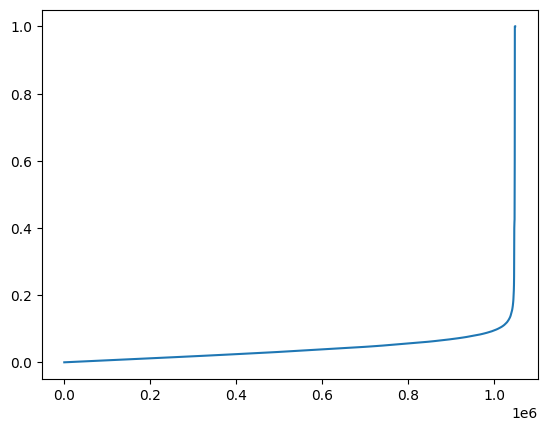

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
LY=0
f = decomp.internal_correlations[LY].flatten()
f.sort()
plt.plot(f)

In [51]:
g_mat = decomp.internal_correlations[LY] * (decomp.internal_correlations[LY] > 0.05)

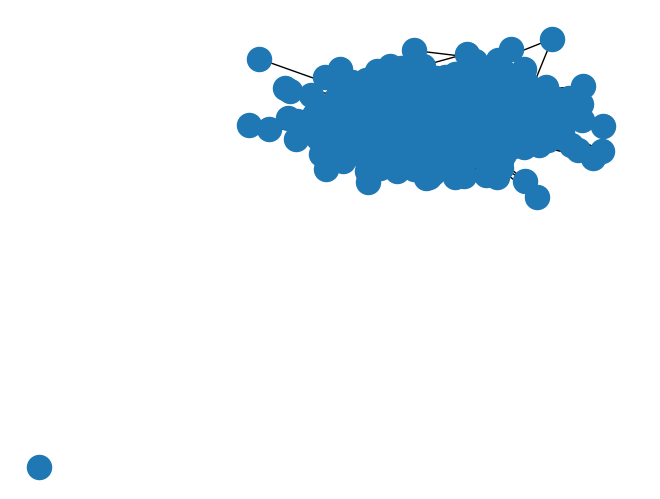

In [52]:
for i in range(len(g_mat)):
	g_mat[i, i] = 0
g = nx.from_numpy_array(g_mat, edge_attr='weight')
nx.draw(g)

In [54]:
g.edges(data=True)

EdgeDataView([(0, 1, {'weight': 0.4248360132089012}), (0, 9, {'weight': 0.10590038405893669}), (0, 76, {'weight': 0.10638909583191132}), (0, 113, {'weight': 0.17841384573038935}), (0, 121, {'weight': 0.10517610263205623}), (0, 138, {'weight': 0.12030064795023927}), (0, 149, {'weight': 0.10717235059287905}), (0, 231, {'weight': 0.12677852278929877}), (0, 253, {'weight': 0.10802428373523236}), (0, 256, {'weight': 0.10193026717944084}), (0, 269, {'weight': 0.10283341628350508}), (0, 275, {'weight': 0.12931890502570723}), (0, 316, {'weight': 0.10166317283589828}), (0, 340, {'weight': 0.1078091550225643}), (0, 347, {'weight': 0.10641064636497967}), (0, 352, {'weight': 0.10895004668818854}), (0, 373, {'weight': 0.10631615702191076}), (0, 383, {'weight': 0.10007182479058763}), (0, 407, {'weight': 0.1375240957170864}), (0, 488, {'weight': 0.10712811169145824}), (0, 502, {'weight': 0.11626184924124491}), (0, 506, {'weight': 0.15253151320006902}), (0, 569, {'weight': 0.15403036948203716}), (0, 5

In [58]:
from typing import List
LIM = 100
cliques_per_node = []
for N in range(1024):
    cliques_per_node.append([])
    y = nx.find_cliques(g, nodes=[N])
    for i, conns in enumerate(y):
        # print(conns)
        cliques_per_node[-1].append(conns)
        if i >= LIM:
            break

In [60]:
nx.get_edge_attributes(g, 'weight')

{(0, 1): 0.4248360132089012,
 (0, 9): 0.10590038405893669,
 (0, 76): 0.10638909583191132,
 (0, 113): 0.17841384573038935,
 (0, 121): 0.10517610263205623,
 (0, 138): 0.12030064795023927,
 (0, 149): 0.10717235059287905,
 (0, 231): 0.12677852278929877,
 (0, 253): 0.10802428373523236,
 (0, 256): 0.10193026717944084,
 (0, 269): 0.10283341628350508,
 (0, 275): 0.12931890502570723,
 (0, 316): 0.10166317283589828,
 (0, 340): 0.1078091550225643,
 (0, 347): 0.10641064636497967,
 (0, 352): 0.10895004668818854,
 (0, 373): 0.10631615702191076,
 (0, 383): 0.10007182479058763,
 (0, 407): 0.1375240957170864,
 (0, 488): 0.10712811169145824,
 (0, 502): 0.11626184924124491,
 (0, 506): 0.15253151320006902,
 (0, 569): 0.15403036948203716,
 (0, 577): 0.12374638561644785,
 (0, 584): 0.16474846006551733,
 (0, 591): 0.11044017712110388,
 (0, 593): 0.12587256214732925,
 (0, 594): 0.12838431748524118,
 (0, 599): 0.10813351288208231,
 (0, 610): 0.12302547879783482,
 (0, 697): 0.10425877874290375,
 (0, 753): 0.102

In [64]:
import numpy as np

def get_avg_clique_weight(clique: List[int]):
    total_weight = 0
    total_cons = 0
    for i in range(len(clique)):
        for j in range(i):
            total_cons += 1
            o = [clique[i], clique[j]]
            o.sort()
            o = tuple(o)
            total_weight += nx.get_edge_attributes(g, 'weight')[o]
    return total_cons / total_weight

for node, cliques in enumerate(cliques_per_node):
    print("Looking at node", node)
    weights = np.array([get_avg_clique_weight(c) for c in cliques])
    tops = np.argsort(weights)[::-1]
    for i in range(10):
        print(tops[i], cliques[tops[i]], weights[tops[i]])
    print("")

Looking at node 0
27 [0, 880] 9.44960052750758
0 [0, 256, 593, 753] 9.29692174909305
61 [0, 1015, 502, 76] 8.669220106202513
14 [0, 987, 593, 9, 753, 275] 8.502074061894211
58 [0, 149, 753, 275] 8.44809961404574
16 [0, 987, 593, 347, 275] 8.330007375191592
21 [0, 138, 954, 253, 753] 8.267651368719331
20 [0, 138, 584, 253] 8.20563235753735
18 [0, 231, 383, 275] 8.19245392069476
1 [0, 256, 593, 506, 347] 8.080815919090057

Looking at node 1
1 [1, 674, 457] 9.50617791941237
2 [1, 708, 826] 8.655050700145019
9 [1, 753, 756] 8.156279936688875
6 [1, 753, 64, 179] 7.616509788802456
0 [1, 674, 64] 7.571440398380355
17 [1, 373, 826, 755] 7.361719205806288
8 [1, 753, 457] 7.200115571607323
7 [1, 753, 64, 463] 6.534996202402057
11 [1, 753, 826, 338] 5.74545908201846
4 [1, 231, 957, 463] 5.499988781038506

Looking at node 2
1 [2, 113, 753, 352, 399, 273] 6.101328737533174
12 [2, 113, 753, 892, 548, 997] 5.89959508736392
4 [2, 113, 753, 303, 820, 814] 5.837196295651747
10 [2, 113, 753, 892, 606, 99

IndexError: index 8 is out of bounds for axis 0 with size 8

## Keep going

In [4]:
from typing import List
import importlib
import utils
importlib.reload(utils)
# modified_lattice = decomp.correlation_scores.copy()

# # TODO: have function which does something like fixing from the a specific neuron?
# # Ie have the sub-lattice with only **related** neurons

# def cutoff_lattice(lattice: List[List[List[float]]], related_cutoff = 1):
#     print(lattice[0].sum())
#     r = [(layer > related_cutoff) * layer for layer in lattice]
#     print(r[0].sum())
#     return r

# def create_sublattice(lattice, layer: int, idx_in_layer: int, related_cutoff = 10):
# 	with_cutoff = cutoff_lattice(lattice, related_cutoff)

# LAST_FEAT = 20
# modified_lattice = cutoff_lattice(decomp.correlation_scores, related_cutoff=15)

# # utils.top_k_dag_paths_dynamic(modified_lattice, k=10_000)

<module 'utils' from '/home/lev/code/research/ai/lattice_cluster_paths/utils.py'>

## Isolate Specific Neurons

In [5]:
LAYER = 0
NEURON = 128

In [6]:
import numpy as np
import kernel
from IPython.core.display import display, HTML
from circuitsvis.utils.render import render
import graph
importlib.reload(cluster_model)
importlib.reload(utils)
importlib.reload(graph)
importlib.reload(kernel)

N_CHECK = 4

# decomp.scores_for_neuron(LAYER, NEURON, n_features_per_neuron=3)

/tmp/ipykernel_45591/2553305548.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Look at distributions of scores

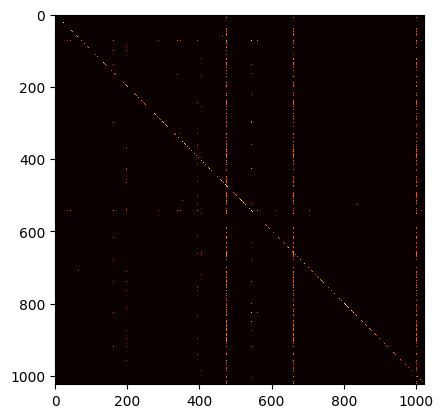

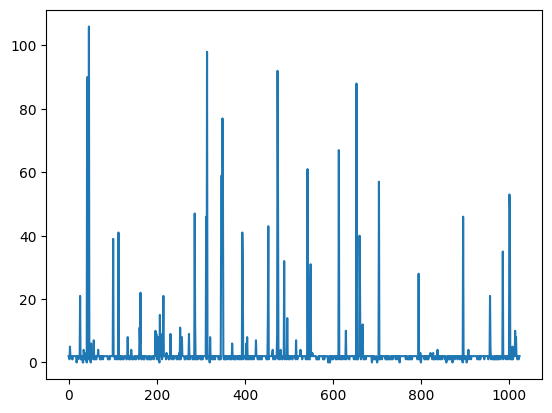

In [7]:
import matplotlib.pyplot as plt

# Get distribution of lattice scores

LAYER_START = 4
cutoff = 0.3

# ax = sns.heatmap(decomp.correlation_scores[LAYER_START])
plt.imshow(decomp.correlation_scores[LAYER_START] * (decomp.correlation_scores[LAYER_START] > cutoff), cmap='hot', interpolation='nearest')
plt.show()

plt.plot((decomp.correlation_scores[3] > cutoff).sum(axis=1))

## Lets look at the distribution of internal correlations

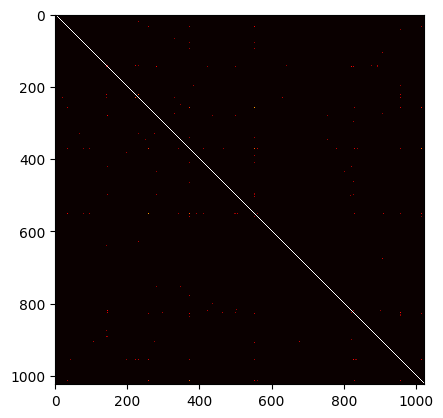

In [8]:
cutoff = 0.2
plt.imshow(decomp.internal_correlations[0] * (decomp.internal_correlations[0] > cutoff), cmap='hot', interpolation='nearest')
plt.show()

## Look at the distribution of scores. Is there someway to figure out what the "inclusion cutoff" should be?

##

13 459325


([<matplotlib.lines.Line2D at 0x7b588360f490>],
 0.1775552987148854,
 0.3140376880331719)

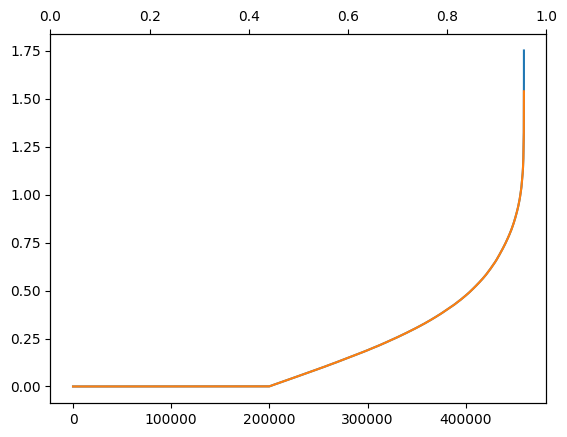

In [9]:
import math

feat = (1, 497)
fs = kernel.feature_prob(decomp.ds_emb[feat[0]], feat[1])
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()
fs.sort()

ax1.plot(fs)
log_idx = int(round( math.log(len(fs))))
print(log_idx, len(fs))
nonzeros = fs[np.where(fs > 0)]
ax1.plot(fs[:-log_idx]), sum(fs) / len(fs), sum(nonzeros) / len(nonzeros)


## Get scores for layers

In [10]:
!rm metadata/correlation-de5f2c593b55f095d11e400fd8f6d0964dc8512c/layer_0_neuron_*

rm: cannot remove 'metadata/correlation-de5f2c593b55f095d11e400fd8f6d0964dc8512c/layer_0_neuron_*': No such file or directory


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [11]:
importlib.reload(graph)
decomp.scores_for_layer(0)

WEIGHTING PER LAYER [1.      0.8     0.64    0.512   0.4096  0.32768]
EDGE DISCOVERY WEIGHTING PER LAYER [1. 1. 1. 1. 1.]
Getting top 7 paths


KeyboardInterrupt: 

In [ ]:
# TODO: LAYER 0 and NEURON 112... I think that its actually no path on the downstream?
decomp.scores_for_layer(4)

WEIGHTING PER LAYER [0.4096 0.512  0.64   0.8    1.     0.8   ]
EDGE DISCOVERY WEIGHTING PER LAYER [1. 1. 1. 1. 1.]
Getting top 7 paths
Looking for disjoint paths
([753, 753, 753, 753, 0, 1], 3.2629518189164104)
([753, 753, 753, 753, 0, 474], 3.1815818189164107)
([753, 753, 753, 753, 0, 346], 3.1770118189164105)
([753, 753, 753, 753, 0, 197], 3.1519818189164104)
([753, 753, 753, 753, 0, 395], 3.1515518189164107)
([753, 753, 753, 753, 0, 660], 3.1288818189164105)
([753, 753, 753, 753, 0, 1000], 3.1264118189164103)
Got top 7 paths
Paths for neuron 0 [([753, 753, 753, 753, 0, 1], 3.2629518189164104), ([753, 753, 753, 753, 0, 474], 3.1815818189164107), ([753, 753, 753, 753, 0, 346], 3.1770118189164105), ([753, 753, 753, 753, 0, 197], 3.1519818189164104), ([753, 753, 753, 753, 0, 395], 3.1515518189164107), ([753, 753, 753, 753, 0, 660], 3.1288818189164105)]
Finished for neuron 4 0
WEIGHTING PER LAYER [0.4096 0.512  0.64   0.8    1.     0.8   ]
EDGE DISCOVERY WEIGHTING PER LAYER [1. 1. 1. 1.

KeyboardInterrupt: 